<a href="https://colab.research.google.com/github/Fer1ado/DataScience/blob/main/PrimeraEntrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Este set de datos "BsAs Real Estate on Sale" ofrece una fuente de información sobre propiedades en venta en el Gran Buenos Aires (G.B.A.), Argentina. Recopilado de la plataforma web Properati, este conjunto de datos proporciona una instantánea del mercado inmobiliario en Zona Norte, Zona Sur y Zona Oeste hasta el año 2020.


---


## Las categorías incluidas en el dataset son:

**start_date:** Día de comienzo de la publicación - *str*

**end_date:** Día de finalización de la publicación - *str*

**created_on:** Día de creación de la publicación - *str*

**lat:** Latitud - *float*

**lon:** Longitud - *float*

**l1:** Codigo de País - *str*

**l2:** Codigo de Provincia - *str*

**l3:** Codigo de Localidad - *str*

**rooms:** Cantidad de Ambientes - *int*

**bedrooms:** Cantidad de habitaciones - *int*

**bathrooms:** Cantidad de Baños - *int*

**surface_total:** Superficie Total de la Parcela m2 - *int*

**surface_covered:**	Superficie Cubierta de la Edificacion en m2 - *int*

**price:** Precio - *int*

**currency:** Tipo de moneda - *str*

**title	description:** Titulo de la publicación - *str*

**property_type:** Tipo de Propiedad categorización de 11 entradas - *str*

**operation_type:** Tipo de Operación Venta/Alquiler - *str*



---



## Este conjunto de datos es fundamental para desarrollar modelos predictivos para la valoración de bienes raíces.

**###Las preguntas de investigación planteadas son:**

¿Cómo varían los precios de las propiedades en Zona Norte, Zona Sur y Zona Oeste?

¿Cuál es la relación entre las características de la propiedad (ej., superficie, número de habitaciones) y los precios de venta?

¿Podemos identificar características específicas de las propiedades que incrementan significativamente su valor?

¿Existen subregiones geográficas dentro del G.B.A. que exhiben patrones de precios distintos?

¿Pueden los modelos de aprendizaje automático predecir con precisión los precios de las propiedades basándose en las características disponibles?

**###Para abordar estas preguntas, se proponen las siguientes hipótesis:**

H1: Los precios de las propiedades en Zona Norte son significativamente más altos que en Zona Sur y Zona Oeste debido a la mayor demanda y la percepción de exclusividad.

H2: La superficie y el número de habitaciones tienen una fuerte correlación positiva con los precios de venta.

H5: Los modelos de aprendizaje automático, en particular los algoritmos de regresión, pueden predecir los precios de las propiedades con una precisión razonable, aprovechando las características clave de las mismas.

Estas preguntas e hipótesis nos ayudarán a comprender a profundidad las dinámicas del mercado inmobiliario en el Gran Buenos Aires y a desarrollar un modelo para predecir los precios de los inmuebles en el área.

In [4]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [87]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure


In [88]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/bsas_realstate_on_sale_properati_dataset_2020.csv")
df.head(100)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-10-17,2019-10-22,2019-10-17,-34.574388,-58.448728,Argentina,Capital Federal,Colegiales,2.0,1.0,1.0,43.0,37.0,151500.0,USD,Precioso departamento a Estrenar con Cochera,"Original Fresco y Moderno Edificio , Ubicado c...",Departamento,Venta
96,2019-10-17,2019-12-23,2019-10-17,-34.696098,-58.511293,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,43.0,40.0,95000.0,USD,2 AMB c/COCH *EXCELENTE ESTADO*,Se vende ESPECTACULAR DEPARTAMENTO en la local...,Departamento,Venta
97,2019-10-17,2020-02-21,2019-10-17,-34.646309,-58.558811,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,1.0,1.0,1.0,25.0,25.0,70000.0,USD,VENTA 2 AMBIENTES RAMOS MEJIA,"DEPARTAMENTO 2 AMBIENTES CONTRA FRENTE, 2 PISO...",Departamento,Venta
98,2019-10-17,2019-12-23,2019-10-17,-34.468323,-58.514608,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,2.0,1.0,1.0,48.0,48.0,165000.0,USD,DEPARTAMENTO EN VENTA CON COCHERA Y BAULERA,LUMINOSO 2 AMBIENTES EN EXCELENTES CONDICIONES...,Departamento,Venta


<Axes: >

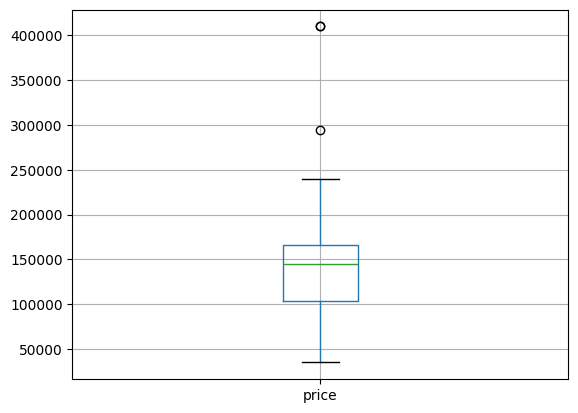

In [91]:
#Ploteando surface_covered para encontrar datos atípicos
_df_5.boxplot(column="price", by=None, ax=None, grid=True)


In [92]:
#formula IQR para limpiar datos atípicos (outlayers)
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

#Encontrando limites intercuartiles en price para sacar outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
median = df["price"].median()

print("median", median)
print("upper limit", upper_limit)
print("lower limit", lower_limit)

df.loc[(df["price"] > upper_limit) | (df["price"] < lower_limit)]

median 166000.0
upper limit 496000.0
lower limit -120000.0


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
152,2019-10-17,2019-12-23,2019-10-17,-34.393765,-58.644893,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,163.0,118.0,650000.0,USD,NORDELTA | ACQUA RIO - Excelente Departamento ...,Espectacular departamento de 3 ambientes con v...,Departamento,Venta
160,2019-10-17,2019-11-19,2019-10-17,-34.590064,-58.382945,Argentina,Capital Federal,Retiro,3.0,2.0,1.0,106.0,106.0,498000.0,USD,VENTA depto excelente vista Rio 2 dormit depen...,"LIVING/COMEDOR, 2 DORMITORIOS, 1 BAÑO COMPLETO...",Departamento,Venta
171,2019-10-17,2019-11-19,2019-10-17,-34.573381,-58.421691,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,99.0,99.0,690000.0,USD,VENTA en TORRES DECO PALERMO 99 m2 con cochera...,"TORRES DECÓ PALERMO - Tprre RosedalDistinción,...",Departamento,Venta
172,2019-10-17,2019-12-23,2019-10-17,-34.582023,-58.424171,Argentina,Capital Federal,Palermo,3.0,2.0,3.0,100.0,100.0,560000.0,USD,PALERMO UNO Torre full Amenities Unico y Excel...,Cochera no incluida en el preco U$S40000Excele...,Departamento,Venta
174,2019-10-17,2019-12-23,2019-10-17,-34.589974,-58.425614,Argentina,Capital Federal,Palermo,3.0,2.0,3.0,100.0,100.0,560000.0,USD,Torre full Amenities Unico y Excelente Duplex ...,Cochera no incluida en el preco U$S40000Excele...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146606,2019-07-31,2019-08-13,2019-07-31,-34.452430,-58.745076,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,10.0,5.0,4.0,615.0,615.0,1600000.0,USD,POLLEDO PROPIEDADES Tortugas Country Club,Lindisima casa en dos plantas sobre lote de 16...,Casa,Venta
146607,2019-07-31,2019-08-14,2019-07-31,-34.453846,-58.750312,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,11.0,4.0,4.0,450.0,450.0,1280000.0,USD,Tortugas Country Club,Espectacular casa en dos plantas. Sobre lote d...,Casa,Venta
146608,2019-07-31,2019-08-14,2019-07-31,-34.454703,-58.740616,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,7.0,5.0,4.0,450.0,450.0,1300000.0,USD,POLLEDO PROPIEDADES VENTA CON RENTA. TORTUGAS ...,Lindisima casa a estrenar. Amplios ambientes J...,Casa,Venta
146631,2019-07-31,2019-08-14,2019-07-31,-34.390502,-58.627147,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,5.0,3.0,3.0,240.0,213.0,650000.0,USD,SOL EXC.VISTA VERDE Y RÍO COHERA-AMARRA-SEVICI...,Excelente Dúplex con importantes detalles de d...,Departamento,Venta


antes de remover outliers 146660
despues de remover outliers 135666
outliers removidos 10994


<Axes: >

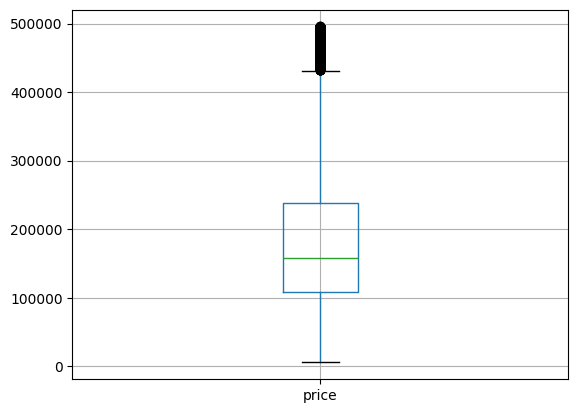

In [93]:
new_df = df.loc[(df['price'] < upper_limit) & (df['price'] > lower_limit)]
print('antes de remover outliers', len(df))
print('despues de remover outliers', len(new_df))
print('outliers removidos', len(df) - len(new_df))

new_df.boxplot(column="price", by=None, ax=None, grid=True)


In [51]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144325 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       144325 non-null  object 
 1   end_date         144325 non-null  object 
 2   created_on       144325 non-null  object 
 3   lat              134776 non-null  float64
 4   lon              134742 non-null  float64
 5   l1               144325 non-null  object 
 6   l2               144325 non-null  object 
 7   l3               144325 non-null  object 
 8   rooms            144325 non-null  float64
 9   bedrooms         144325 non-null  float64
 10  bathrooms        138578 non-null  float64
 11  surface_total    124084 non-null  float64
 12  surface_covered  123023 non-null  float64
 13  price            144325 non-null  float64
 14  currency         144325 non-null  object 
 15  title            144325 non-null  object 
 16  description      144325 non-null  object 
 

<Axes: xlabel='surface_covered', ylabel='rooms'>

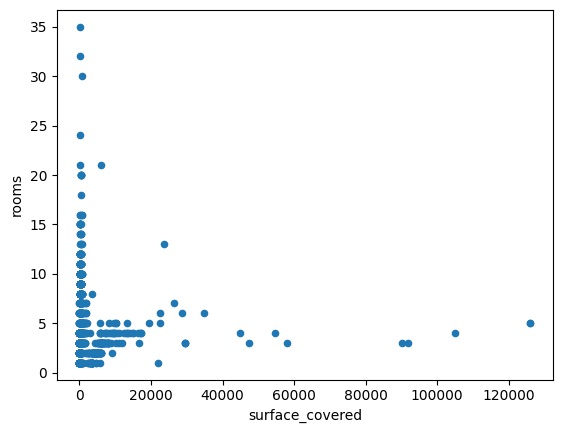

In [94]:
#Ploteando surface_covered para encontrar datos atípicos
new_df.plot(kind='scatter', x='surface_covered', y='rooms')


In [95]:
#formula IQR para limpiar datos atípicos (outlayers) en surface_covered
q1 = df["surface_covered"].quantile(0.25)
q3 = df["surface_covered"].quantile(0.75)
iqr = q3 - q1

#Encontrando limites intercuartiles en surface_covered para sacar outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
median = df["surface_covered"].median()

print("median", median)
print("upper limit", upper_limit)
print("lower limit", lower_limit)

df.loc[(df["surface_covered"] > upper_limit) | (df["surface_covered"] < lower_limit)]


median 68.0
upper limit 199.5
lower limit -44.5


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
125,2019-10-17,2019-12-23,2019-10-17,-34.710146,-58.386282,Argentina,Bs.As. G.B.A. Zona Sur,Lanús,3.0,2.0,1.0,250.0,250.0,210000.0,USD,Departamentos tipo casa Centro de Lanus 2 y 3 ...,"Excelente ubicacion, pleno centro de Lanus.2 P...",PH,Venta
252,2019-10-17,9999-12-31,2019-10-17,-34.871555,-58.025476,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,USD,"12 entre 485 y 486.Casa en venta, Villa Castel...","Casa en venta , muy buena ubicación, zona tran...",Casa,Venta
253,2019-10-17,9999-12-31,2019-10-17,-34.882295,-58.028515,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,USD,18 entre 491 y 491bis - Casa en Venta en Gonnet,18 entre 491 y 491 bis. Casa desarrollada en d...,Casa,Venta
255,2019-10-17,9999-12-31,2019-10-17,-34.598231,-58.569898,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,4.0,3.0,3.0,341.0,212.0,11111111.0,USD,VENTA CASA EN CASEROS,Venta casa en Caseros desarrollada en 2 planta...,Casa,Venta
274,2019-10-17,2019-11-12,2019-10-17,-34.572445,-58.420624,Argentina,Capital Federal,Palermo,6.0,3.0,2.0,304.0,304.0,1480000.0,USD,VENTA PALERMO,"Superficie: 304,30m2Características:FrenteMuy ...",Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146612,2019-07-31,2020-01-17,2019-07-31,-34.467206,-58.858964,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,3.0,220.0,220.0,270000.0,USD,VENTA DORMI DE POLO MARTINDALE CC,VENTADORMIE DE POLO MARTINDALE CCPB. living co...,Departamento,Venta
146613,2019-07-31,2019-09-04,2019-07-31,-34.467469,-58.859391,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,2.0,220.0,220.0,250000.0,USD,DORMIE EN MARTINDALE C.C. - Mallmann Propiedades,PLANTA BAJA• Hall de entrada• Toilete• Living ...,Departamento,Venta
146626,2019-07-31,2020-01-17,2019-07-31,-34.933308,-58.486543,Argentina,Bs.As. G.B.A. Zona Sur,San Vicente,4.0,3.0,2.0,236.0,236.0,350000.0,USD,COUNTRY EL LAUQUEN - CASA EN ALQUILER - CANNING,ESPECTACULAR CASA EN COUNTRY CLUB EL LAUQUEN E...,Casa,Venta
146631,2019-07-31,2019-08-14,2019-07-31,-34.390502,-58.627147,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,5.0,3.0,3.0,240.0,213.0,650000.0,USD,SOL EXC.VISTA VERDE Y RÍO COHERA-AMARRA-SEVICI...,Excelente Dúplex con importantes detalles de d...,Departamento,Venta


antes de remover outliers 135666
despues de remover outliers 110016
outliers -25650


<Axes: >

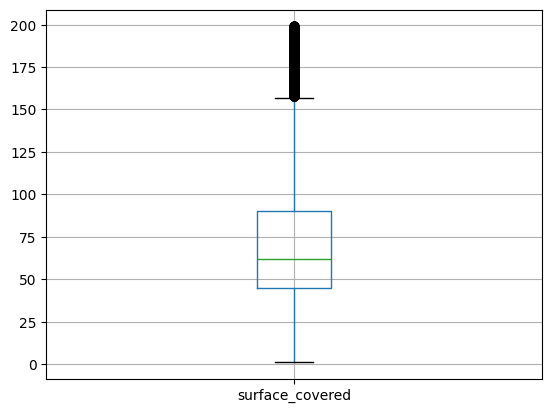

In [96]:
#Sacando los outlayers de surface_covered
n2_df = new_df.loc[(df['surface_covered'] < upper_limit) & (df['surface_covered'] > lower_limit)]
print('antes de remover outliers', len(new_df))
print('despues de remover outliers', len(n2_df))
print('outliers', len(n2_df) - len(new_df))

n2_df.boxplot(column="surface_covered", by=None, ax=None, grid=True)


<Axes: xlabel='surface_total', ylabel='price'>

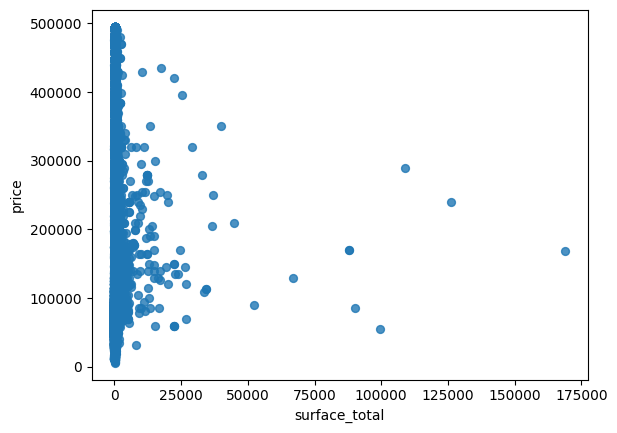

In [97]:
#Ploteando surface_total para encontrar datos atípicos
n2_df.plot(kind='scatter', x='surface_total', y='price', s=32, alpha=.8)

In [98]:
#formula IQR para limpiar datos atípicos (outlayers) en surface_total
q1 = df["surface_total"].quantile(0.25)
q3 = df["surface_total"].quantile(0.75)
iqr = q3 - q1

#Encontrando limites intercuartiles en surface_total para sacar outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
median = df["surface_total"].median()

print("median", median)
print("upper limit", upper_limit)
print("lower limit", lower_limit)

df.loc[(df["surface_total"] > upper_limit) | (df["surface_total"] < lower_limit)]

median 78.0
upper limit 272.0
lower limit -80.0


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
138,2019-10-17,9999-12-31,2019-10-17,-34.630374,-58.707596,Argentina,Bs.As. G.B.A. Zona Oeste,Ituzaingó,3.0,2.0,1.0,292.0,90.0,110000.0,USD,CASA 3 AMBIENTES SOBRE LOTE 10 X 20,ITUZAINGO NORTE: Casa tres ambientes con gara...,Casa,Venta
252,2019-10-17,9999-12-31,2019-10-17,-34.871555,-58.025476,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,USD,"12 entre 485 y 486.Casa en venta, Villa Castel...","Casa en venta , muy buena ubicación, zona tran...",Casa,Venta
253,2019-10-17,9999-12-31,2019-10-17,-34.882295,-58.028515,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,USD,18 entre 491 y 491bis - Casa en Venta en Gonnet,18 entre 491 y 491 bis. Casa desarrollada en d...,Casa,Venta
254,2019-10-17,9999-12-31,2019-10-17,-34.497341,-58.567165,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,6.0,3.0,3.0,1000.0,190.0,370000.0,USD,Venta Casa en San Isidro G.B.A. Zona Norte ABR...,"Casa en Venta, CASA EN VENTA EN LOMAS DE SAN I...",Casa,Venta
255,2019-10-17,9999-12-31,2019-10-17,-34.598231,-58.569898,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,4.0,3.0,3.0,341.0,212.0,11111111.0,USD,VENTA CASA EN CASEROS,Venta casa en Caseros desarrollada en 2 planta...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146605,2019-07-31,2019-08-14,2019-07-31,-34.452332,-58.748984,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,9.0,6.0,3.0,350.0,350.0,680000.0,USD,POLLEDO PROPIEDADES TORTUGAS COUNTRY CLUB,Casa en venta. Gran jardín con pileta y galerí...,Casa,Venta
146606,2019-07-31,2019-08-13,2019-07-31,-34.452430,-58.745076,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,10.0,5.0,4.0,615.0,615.0,1600000.0,USD,POLLEDO PROPIEDADES Tortugas Country Club,Lindisima casa en dos plantas sobre lote de 16...,Casa,Venta
146607,2019-07-31,2019-08-14,2019-07-31,-34.453846,-58.750312,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,11.0,4.0,4.0,450.0,450.0,1280000.0,USD,Tortugas Country Club,Espectacular casa en dos plantas. Sobre lote d...,Casa,Venta
146608,2019-07-31,2019-08-14,2019-07-31,-34.454703,-58.740616,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,7.0,5.0,4.0,450.0,450.0,1300000.0,USD,POLLEDO PROPIEDADES VENTA CON RENTA. TORTUGAS ...,Lindisima casa a estrenar. Amplios ambientes J...,Casa,Venta


antes de remover outliers 135666
despues de remover outliers 106473
outliers -29193


<Axes: >

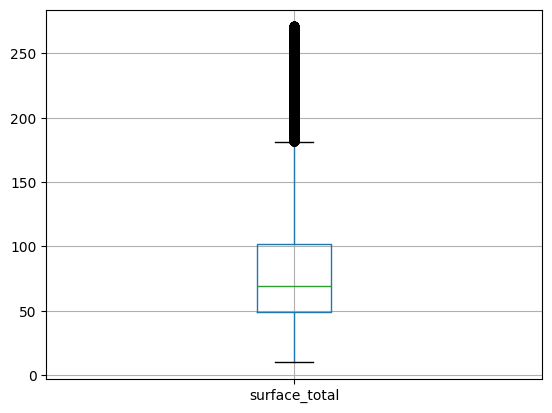

In [99]:
#Sacando los outlayers en surface_total
n2_df = new_df.loc[(df['surface_total'] < upper_limit) & (df['surface_total'] > lower_limit)]
print('antes de remover outliers', len(new_df))
print('despues de remover outliers', len(n2_df))
print('outliers', len(n2_df) - len(new_df))

n2_df.boxplot(column="surface_total", by=None, ax=None, grid=True)


<Axes: ylabel='Frequency'>

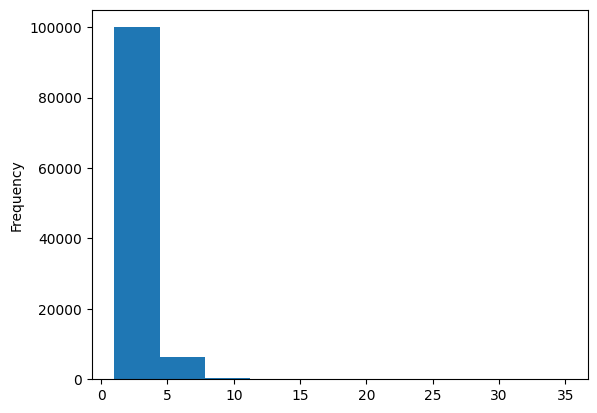

In [100]:
#Ploteando rooms para encontrar datos atípicos
n2_df["rooms"].plot(kind='hist', x='rooms')

In [101]:
#formula IQR para limpiar datos atípicos (outlayers) en rooms
q1 = n2_df["rooms"].quantile(0.25)
q3 = n2_df["rooms"].quantile(0.75)
iqr = q3 - q1

#Encontrando limites intercuartiles en rooms para sacar outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
median = df["rooms"].median()

print("median", median)
print("upper limit", upper_limit)
print("lower limit", lower_limit)

n2_df.loc[(df["rooms"] > upper_limit) | (df["rooms"] < lower_limit)]

median 3.0
upper limit 4.5
lower limit 0.5


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
266,2019-10-17,2019-10-24,2019-10-17,-34.595895,-58.379861,Argentina,Capital Federal,Retiro,5.0,3.0,3.0,133.0,133.0,330000.0,USD,IMPECABLE DEPARTAMENTO EN VENTA EN PLAZA SAN M...,Impecable departamento de 133 m2 sobre Suipach...,Departamento,Venta
292,2019-10-17,9999-12-31,2019-10-17,-34.920129,-57.941689,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,5.0,3.0,2.0,80.0,80.0,130000.0,USD,LA PLATA DEPARTAMENTO EN VENTA 3D COCHERA,"EN VENTA DPTO LA PLATA 3 DORMITORIOS , COCINA ...",Departamento,Venta
298,2019-10-17,2019-12-23,2019-10-17,-34.587383,-58.397276,Argentina,Capital Federal,Recoleta,5.0,3.0,2.0,149.0,141.0,398000.0,USD,Arenales esquina Azcuénaga,Edificio antiguo de categoría. Piso todo en es...,Departamento,Venta
306,2019-10-17,2019-10-24,2019-10-17,-34.595826,-58.379853,Argentina,Capital Federal,Barrio Norte,5.0,3.0,3.0,133.0,133.0,330000.0,USD,IMPECABLE DEPARTAMENTO EN VENTA EN PLAZA SAN M...,Impecable departamento de 133 m2 sobre Suipach...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146404,2019-07-31,2019-08-14,2019-07-31,-34.353293,-58.803615,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,5.0,2.0,1.0,111.0,57.0,75000.0,USD,CASA EN PH A RECICLAR,"Casa en Ph compuesta por Hall-Living,Cocina-Co...",Casa,Venta
146550,2019-07-31,2019-09-21,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,USD,PH de diseño - 5 ambientes con Terraza sobre ...,PH de diseño de 2 dormitorios con escritorio a...,PH,Venta
146593,2019-07-31,2019-09-20,2019-07-31,-34.429961,-58.797457,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,5.0,4.0,3.0,175.0,122.0,210000.0,USD,VALERIA LOPEZ PROPIEDADES I AMPLIO DEPTO! EXCE...,Excelente departamento ubicado en planta alta....,Departamento,Venta
146598,2019-07-31,2020-01-17,2019-07-31,-34.655417,-58.713289,Argentina,Bs.As. G.B.A. Zona Oeste,Merlo,5.0,3.0,1.0,86.0,86.0,55000.0,USD,SULLIVAN// DEPARTAMENTO EN VENTA// 5 AMBIENTES,DEPARTAMENTO EN VENTA CONTRAFRENTE CON 3 DORMI...,Departamento,Venta


antes de remover outliers 135666
despues de remover outliers 122862
outliers -12804


<Axes: >

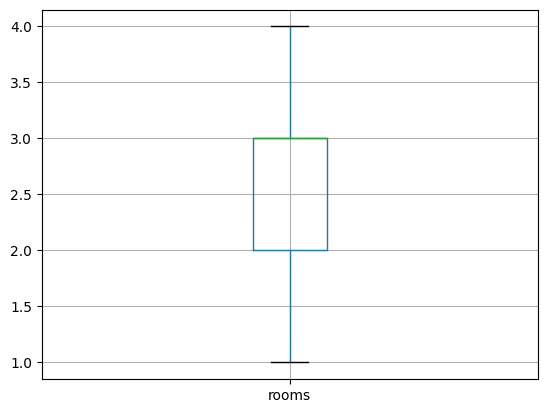

In [103]:
#Sacando los outlayers en rooms
n2_df = new_df.loc[(df['rooms'] < upper_limit) & (df['rooms'] > lower_limit)]
print('antes de remover outliers', len(new_df))
print('despues de remover outliers', len(n2_df))
print('outliers', len(n2_df) - len(new_df))

n2_df.boxplot(column="rooms", by=None, ax=None, grid=True)
